In [31]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [32]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fight/CDI_Based/Intensity/CSV/Euler_Num.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

0   1   2   3   4   5   6   7   8   9  ...  19  20  21  22  23  24  25  \
0  34  18  58  17   2   0   2   2   0   0  ...  44  65  42  70  62  49  47   
1  55  55  48  60  44  49  56  53  66  71  ...  55  54  49  35  33  95  70   
2  57  58  58  52  85  22  10  11  46  70  ...  42  35  14  27   3  69  22   
3  80  12   6   6   9  68  15   6   7  17  ...  28  87  12  14   7   6  81   
4  44  52  32  18  22  54  28   8  22  26  ...  14  38  20  14  18  12  27   

   26  27  Class  
0  62  47      1  
1  66  83      1  
2  11   8      1  
3  12   7      1  
4  20  16      1  

[5 rows x 29 columns]

In [33]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
# std =StandardScaler()
# X_train=std.fit_transform(X_train)
# x_test=std.transform(x_test)


In [34]:
clf = svm.OneClassSVM(kernel='poly',nu=0.5)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.7833333333333333
              precision    recall  f1-score   support

          -1       0.86      0.84      0.85        88
           1       0.59      0.62      0.61        32

    accuracy                           0.78       120
   macro avg       0.72      0.73      0.73       120
weighted avg       0.79      0.78      0.79       120



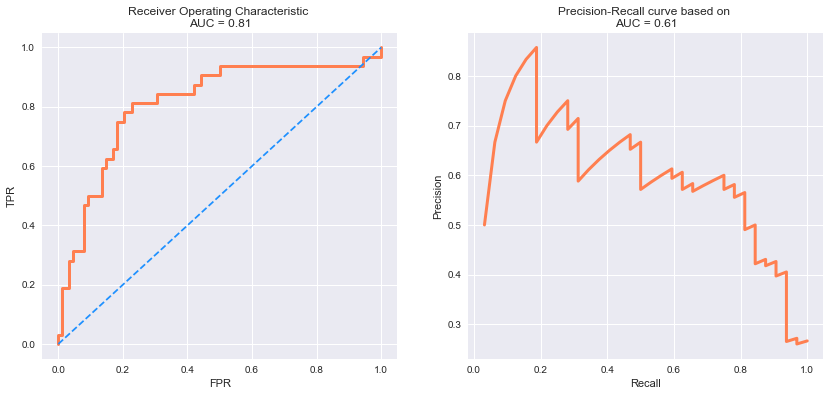

In [35]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()